In [1]:
import os, yaml, numpy, matplotlib.pyplot

In [2]:
def fetch_and_load_rounds() -> list[dict]:
    result = []
    for filename in os.listdir('rounds'):
        if '.yml' in filename:
            with open(os.path.join('rounds', filename), 'r') as file:
                result.append(yaml.load(file, Loader=yaml.Loader))
    return result

In [3]:
def sum_two_rounds(dst: dict, src: dict) -> dict:
    for (metric, value), data in src.items():
        if (metric, value) not in dst:
            dst[(metric, value)] = {}
        for record in data:
            ID = record['ID']
            if ID not in dst[(metric, value)]:
                dst[(metric, value)][ID] = {'ID': ID}
            for key in record.keys():
                if key not in ['ID']:
                    dst[(metric, value)][ID][key] = (dst[(metric, value)][ID].get(key) or 0) + record[key]
    return dst

def divide_round_by(round: dict, delta: float) -> dict:
    for (metric, value) in round.keys():
        for ID in round[(metric, value)].keys():
            for key in round[(metric, value)][ID].keys():
                if key not in ['ID']:
                    round[(metric, value)][ID][key] /= delta
    return round

def squash_rounds(rounds: list) -> dict:
    obj = {}
    delta = len(rounds)
    for round in rounds:
        obj = sum_two_rounds(obj, round)
    obj = divide_round_by(obj, delta)
    return obj

In [4]:
def prepare_round_record_for_plot(record: dict) -> tuple[str, numpy.array, numpy.array]:
    ID = record['ID']
    Xs, Ys = [], []
    for key in record.keys():
        if key not in ['ID']:
            Xs.append(key)
            Ys.append(record[key])
    return ID, numpy.array(Xs), numpy.array(Ys)

def prepare_round_records_for_plot(records: list) -> dict:
    result = {}
    for record in records.values():
        ID, Xs, Ys = prepare_round_record_for_plot(record)
        result[ID] = (ID, Xs, Ys)
    return result

In [5]:
def plot_diagram(round: dict, metric: str, value: str):
    metric_data = prepare_round_records_for_plot(round[(metric, value)])
    fig = matplotlib.pyplot.figure(figsize=(10, 5))
    for (ID, Xs, Ys) in metric_data.values():
        matplotlib.pyplot.plot(Xs, Ys, label=ID, marker='o')
    matplotlib.pyplot.title((metric, value))
    matplotlib.pyplot.legend()
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()

In [6]:
_rounds = fetch_and_load_rounds()
_round = squash_rounds(_rounds)
print(_round.keys())
print(_round[('mean_awt_xdir', 'mean')])

dict_keys([('mean_awt_xdir', 'max'), ('mean_awt_xdir', 'mean'), ('mean_awt_xdir', 'median'), ('mean_awt_xdir', 'min'), ('mean_awt_xdir', 'var'), ('median_awt_xdir', 'max'), ('median_awt_xdir', 'mean'), ('median_awt_xdir', 'median'), ('median_awt_xdir', 'min'), ('median_awt_xdir', 'var'), ('std_awt_xdir', 'max'), ('std_awt_xdir', 'mean'), ('std_awt_xdir', 'median'), ('std_awt_xdir', 'min'), ('std_awt_xdir', 'var')])
{'fixed-mono-default-ql-nsa-1': {'ID': 'fixed-mono-default-ql-nsa-1', 'J0': 164.0115070338808, 'J3': 202.03499021446459, 'J4': 202.23023460827818, 'J5': 201.55326155960176, 'J6': 206.10322001423697, 'J7': 205.61181012221172}, 'fixed15-mono-default-ql-nsa-1': {'ID': 'fixed15-mono-default-ql-nsa-1', 'J0': 164.01150703388083, 'J3': 202.03499021446459, 'J4': 202.23023460827818, 'J5': 201.55326155960176, 'J6': 206.10322001423697, 'J7': 205.61181012221172}, 'fixed30-mono-default-ql-nsa-1': {'ID': 'fixed30-mono-default-ql-nsa-1', 'J0': 164.0115070338808, 'J3': 202.03499021446459, '

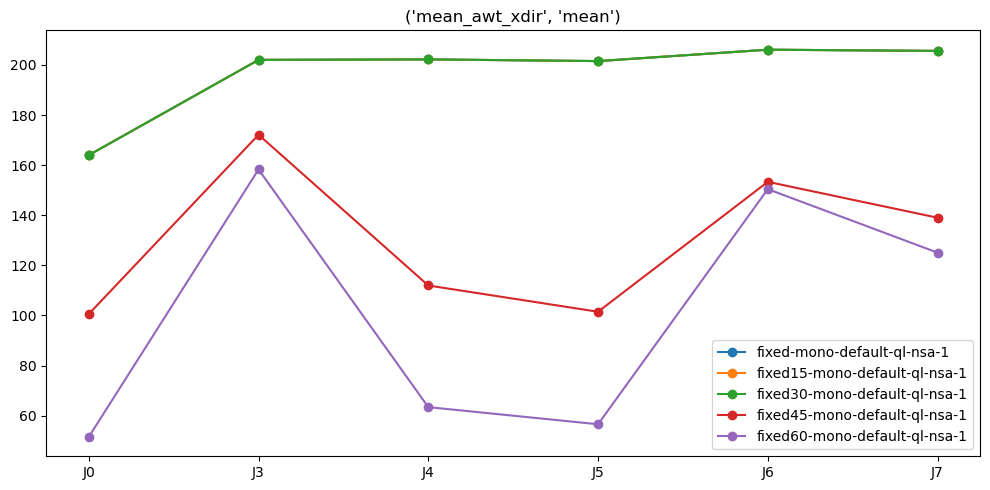

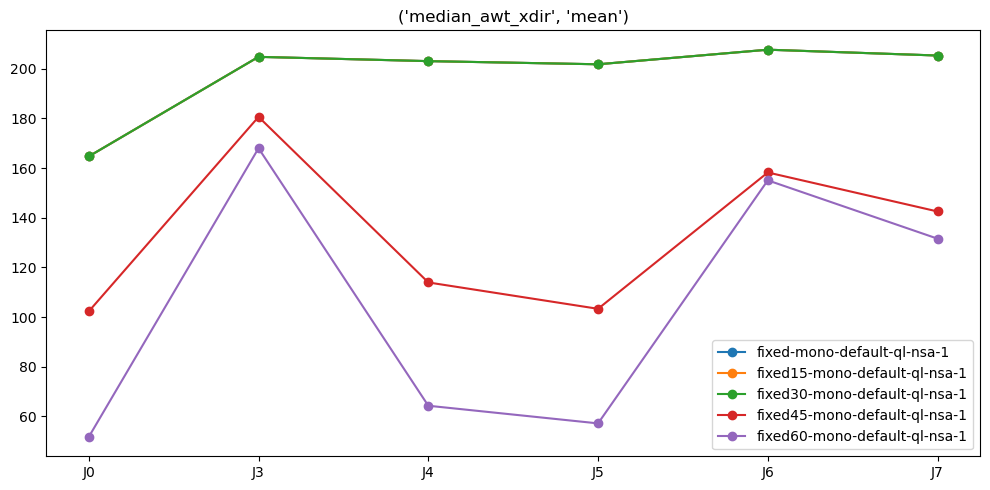

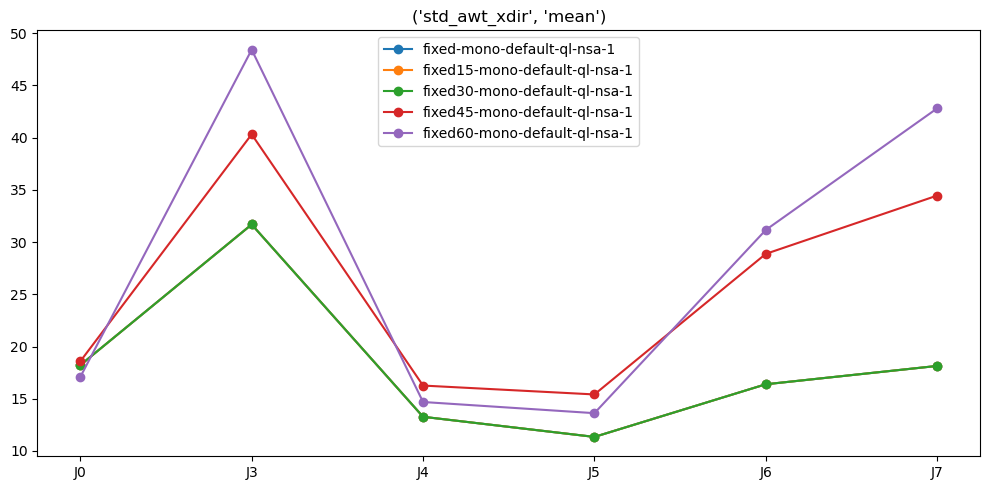

In [7]:
for (metric, value) in _round.keys():
    if value in ['mean']:
        plot_diagram(_round, metric, value)

In [8]:
with open('metrices.yml', 'w') as file:
    yaml.dump(_round, file)